## Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days
Dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp <br>
How this dataset was used: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm

"Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, gender, race and ethnicity, and educational attainment." The [data] shows the percentage of adults who report symptoms of anxiety or depression that have been shown to be associated with diagnoses of generalized anxiety disorder or major depressive disorder.  These symptoms generally occur more than half the days or nearly every day.

2019 Benchmarks to compare against the data collected:<br>
-8.1% of adults aged 18 and over had symptoms of anxiety disorder<br>
-6.5% had symptoms of depressive disorder<br>
-10.8% had symptoms of anxiety disorder or depressive disorder

The National Center for Health Statistics conducted this survey in 3 phases. <br>

Phase 1 04/23/2020 - 07/21/2020<br>
Phase 2 08/19/2020 - 10/28/2020<br>
Phase 3 10/28/2020 - 03/29/2021<br>
Phase 3.1 04/14/2021 - 07/05/2021<br>
Phase 3.2 07/21/2021 - 10/11/2021**<br>
Phase 3.3 12/01/2021 - 02/07/2022<br>
Phase 3.4 02/23/2022 - 05/02/2022<br>
**At each phase, the survey asked about the "last 7 days". <br> Beginning in Phase 3.2, the survey asked about the "last two weeks"

In [13]:
#import libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#load dataset

df = pd.read_csv('AnxietyData.csv', parse_dates=['Time Period Start Date', 'Time Period End Date'])

# 

# EDA

In [4]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN


In [5]:
df.dtypes

Indicator                         object
Group                             object
State                             object
Subgroup                          object
Phase                             object
Time Period                        int64
Time Period Label                 object
Time Period Start Date    datetime64[ns]
Time Period End Date      datetime64[ns]
Value                            float64
Low CI                           float64
High CI                          float64
Confidence Interval               object
Quartile Range                    object
dtype: object

In [6]:
#values in the Group column 
df['Group'].unique()

#national estimate in Group column seems different than rest of values

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [7]:
df['Subgroup'].unique()
#in the article in which this dataset was used, they split up the subgroup categories into y axis categories. 
#perhaps there is no need to clean this column, but rather create new columns out of each subgroup (age, state, race, orientation)


array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [8]:
#values in the Indicators column
df['Indicator'].unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [9]:
#Data collection starts 04/23/2020
df['Time Period Start Date'].min()

Timestamp('2020-04-23 00:00:00')

In [10]:
#Data collection ends 01/10/2022
df['Time Period End Date'].max()

Timestamp('2022-01-10 00:00:00')

In [11]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
df['Phase'].unique()

#considering replacing the values that are not 1,2,3 by using the date ranges

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3'], dtype=object)

In [13]:
df['Time Period'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41], dtype=int64)

In [14]:
df['Time Period Label'].unique()

array(['Apr 23 - May 5, 2020', 'May 7 - May 12, 2020',
       'May 14 - May 19, 2020', 'May 21 - May 26, 2020',
       'May 28 - June 2, 2020', 'June 4 - June 9, 2020',
       'June 11 - June 16, 2020', 'June 18 - June 23, 2020',
       'June 25 - June 30, 2020', 'July 2 - July 7, 2020',
       'July 9 - July 14, 2020', 'July 16 - July 21, 2020',
       'July 22 - Aug 18, 2020', 'Aug 19 - Aug 31, 2020',
       'Sep 2 - Sep 14, 2020', 'Sep 16 - Sep 28, 2020',
       'Sep 30 - Oct 12, 2020', 'Oct 14 - Oct 26, 2020',
       'Oct 28 - Nov 9, 2020', 'Nov 11 - Nov 23, 2020',
       'Nov 25 - Dec 7, 2020', 'Dec 9 - Dec 21, 2020',
       'Dec 22, 2020 - Jan 5, 2021', 'Jan 6 - Jan 18, 2021',
       'Jan 20 - Feb 1, 2021', 'Feb 3 - Feb 15, 2021',
       'Feb 17 - Mar 1, 2021', 'Mar 3 - Mar 15, 2021',
       'Mar 17 - Mar 29, 2021', 'Mar 30 - Apr 13, 2021',
       'Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Jun 9 - Jun 21, 2021

In [15]:
df['Time Period Label'].isnull().sum()

#Time Period Label, Time Period Start Date and End Date have no missing values and are consistent across the df
#Using one of these columnns will be more reliable for the purpose of standardizing the data than using the Phase column 
#Unclear what the current values in Phase mean so I will create a new set of values

0

In [80]:
#create df of date related columns
Dates = df[['Phase','Time Period','Time Period Label','Time Period Start Date', 'Time Period End Date']]
Dates

,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date
0,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05
1,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05
2,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05
3,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05
4,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05
...,...,...,...,...,...
9130,3.3,41,"Dec 29, 2021 - Jan 10, 2022",2021-12-29,2022-01-10
9131,3.3,41,"Dec 29, 2021 - Jan 10, 2022",2021-12-29,2022-01-10
9132,3.3,41,"Dec 29, 2021 - Jan 10, 2022",2021-12-29,2022-01-10
9133,3.3,41,"Dec 29, 2021 - Jan 10, 2022",2021-12-29,2022-01-10


In [17]:
Dates.dtypes

Phase                             object
Time Period                        int64
Time Period Label                 object
Time Period Start Date    datetime64[ns]
Time Period End Date      datetime64[ns]
dtype: object

In [4]:
#go through each row start and end date  
#assign it to one of the phases according to it's date range 
#create a new column with these phase values (call it NewPhase)

#create a list of conditions
conditions = [ 
    (df['Time Period Start Date'] >= '2020-04-23T00:00:00.000000000') & (df['Time Period End Date'] <='2020-07-21T00:00:00.000000000'), #Phase 1   04/23/2020 - 07/21/2020
    (df['Time Period Start Date'] >= '2020-08-19T00:00:00.000000000') & (df['Time Period End Date'] <='2020-10-26T00:00:00.000000000'), #Phase 2   08/19/2020 - 10/26/2020
    (df['Time Period Start Date'] >= '2020-10-28T00:00:00.000000000') & (df['Time Period End Date'] <='2021-03-29T00:00:00.000000000'), #Phase 3   10/28/2020 - 03/29/2021
    (df['Time Period Start Date'] >= '2021-04-14T00:00:00.000000000') & (df['Time Period End Date'] <='2021-07-05T00:00:00.000000000'), #Phase 3.1 04/14/2021 - 07/05/2021
    (df['Time Period Start Date'] >= '2021-07-21T00:00:00.000000000') & (df['Time Period End Date'] <='2021-10-11T00:00:00.000000000'), #Phase 3.2 07/21/2021 - 10/11/2021
    (df['Time Period Start Date'] >= '2021-12-01T00:00:00.000000000') & (df['Time Period End Date'] <='2022-02-07T00:00:00.000000000'), #Phase 3.3 12/01/2021 - 02/07/2022
    (df['Time Period Start Date'] >= '2022-02-23T00:00:00.000000000') & (df['Time Period End Date'] <='2022-05-02T00:00:00.000000000')  #Phase 3.4 02/23/2022 - 05/02/2022
    ]
#create a list of the values we want to assign for each condition
values = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 3.1', 'Phase 3.2','Phase 3.3', 'Phase 3.4']

#create a new column and use np.select to assign values to it using our lists as arguments
df['NewPhase'] = np.select(conditions, values)

#display the updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,NewPhase
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


In [82]:
#check for any df missing values
df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      297
Low CI                     297
High CI                    297
Confidence Interval        297
Quartile Range            2862
NewPhase                     0
dtype: int64

In [85]:
#missing values for the Value column
df[df['Value'].isna()]

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,NewPhase
2520,Symptoms of Depressive Disorder,National Estimate,United States,United States,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN,0
2521,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN,0
2522,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN,0
2523,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN,0
2524,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,High school diploma or GED,-1,1,"Oct 12 - Nov 30, 2021",2021-10-12,2021-11-30,NaN,NaN,NaN,NaN,NaN,0
8819,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Some college/Associate's degree,-1,1,"Oct 12 - Nov 30, 2021",2021-10-12,2021-11-30,NaN,NaN,NaN,NaN,NaN,0
8820,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Bachelor's degree or higher,-1,1,"Oct 12 - Nov 30, 2021",2021-10-12,2021-11-30,NaN,NaN,NaN,NaN,NaN,0
8821,Symptoms of Anxiety Disorder or Depressive Dis...,By Disability status,United States,With disability,-1,1,"Oct 12 - Nov 30, 2021",2021-10-12,2021-11-30,NaN,NaN,NaN,NaN,NaN,0


In [7]:
filtered_df = df[df['Value'].isna()]

In [8]:
#Ask Vicky again about this. I think I understand... 
#This is showing the Group column values that have NA in the Value column 
filtered_df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status'], dtype=object)

In [25]:
#function takes a value from the Group column as the parameter and returns the count of NA
def check_na_count(group):
    groupdf = df[df['Group'] == group]
    length_of_na = len(groupdf[groupdf['Value'].isna()])

    length_of_df = len(groupdf)

    na_as_percentage = round((length_of_na/length_of_df),2)

    outputstring = f"Out of {length_of_df}, there are {length_of_na} missing values. {na_as_percentage}% missing" 

    return outputstring

In [26]:
check_na_count('National Estimate')

'Out of 138, there are 15 missing values. 0.11% missing'

In [27]:
check_na_count('By Age')

'Out of 966, there are 105 missing values. 0.11% missing'

In [28]:
check_na_count('By Sex')

'Out of 276, there are 30 missing values. 0.11% missing'

In [ ]:
check_na_count('By Race/Hispanic ethnicity')

'Out of 690, there are 75 missing values. 0.11% missing'

In [ ]:
check_na_count('By Education')

'Out of 552, there are 60 missing values. 0.11% missing'

In [ ]:
check_na_count('By Disability status')

'Out of 96, there are 12 missing values. 0.12% missing'

It seems that the missing na's percentage is not significant enough in any group so will proceed with the data as is. 

In [15]:
#create a new df with relevant columns
clean_df = df[['Indicator','State','Group', 'Subgroup','NewPhase', 'Time Period Start Date', 'Time Period End Date', 'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range']]

clean_df

,Indicator,State,Group,Subgroup,NewPhase,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,United States,National Estimate,United States,Phase 1,2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 3.3,2021-12-29,2022-01-10,35.4,31.4,39.5,31.4 - 39.5,34.7-40.6
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 3.3,2021-12-29,2022-01-10,32.7,29.4,36.1,29.4 - 36.1,32.3-34.6
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 3.3,2021-12-29,2022-01-10,34.6,29.3,40.2,29.3 - 40.2,32.3-34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 3.3,2021-12-29,2022-01-10,25.5,21.6,29.8,21.6 - 29.8,24.8-29.7


In [22]:
clean_df = clean_df[clean_df['NewPhase'] != '0']

clean_df

,Indicator,State,Group,Subgroup,NewPhase,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,United States,National Estimate,United States,Phase 1,2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 3.3,2021-12-29,2022-01-10,35.4,31.4,39.5,31.4 - 39.5,34.7-40.6
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 3.3,2021-12-29,2022-01-10,32.7,29.4,36.1,29.4 - 36.1,32.3-34.6
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 3.3,2021-12-29,2022-01-10,34.6,29.3,40.2,29.3 - 40.2,32.3-34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 3.3,2021-12-29,2022-01-10,25.5,21.6,29.8,21.6 - 29.8,24.8-29.7


# EDA Questions:<br>
After looking through the data some questions to consider: 

Q: Is there a State that had a higher percentage of symptoms reported? anxiety, depression, both? <br>
Q: Is there a group/subgroup affected more than others? <br>
Q: Did symptoms get worse, better, or same with each Phase? <br>
Q: Is there a Phase that stands out? Would be interesting to try to find contributors (was the state in lockdown, did mask requirements change)

Possible projects:<br>
-focus on Texas statistics only<br>
-select a few states with interesting statistics<br>
-show how state mandates have some correlation with anxiety/depression/both<br>
-add unemployment data to compare with this dataset?

# Objective

1. Isolate Texas statistics
2. Find trends in Age subgroup.
3. Find trends in Race subgroup.
4. Find trends in percentage of anxiety, depression, both across different study periods. 


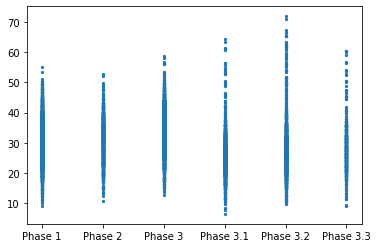

In [29]:
plt.scatter(clean_df['NewPhase'], clean_df['Value'], s= 5)

plt.show()

# Isolate Texas statistics

In [31]:
#create a dataframe for the state of Texas only

Texas = clean_df[clean_df.State == 'Texas']

Texas

,Indicator,State,Group,Subgroup,NewPhase,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
62,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,2020-04-23,2020-05-05,24.4,21.1,27.9,21.1 - 27.9,24.1 - 28.7
132,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,2020-04-23,2020-05-05,29.7,25.9,33.7,25.9 - 33.7,27.9 - 30.3
202,Symptoms of Anxiety Disorder or Depressive Dis...,Texas,By State,Texas,Phase 1,2020-04-23,2020-05-05,34.9,30.8,39.2,30.8 - 39.2,34.8 - 36.7
272,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,2020-05-07,2020-05-12,25.7,21.8,30.0,21.8 - 30.0,25.7 - 35.5
342,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,2020-05-07,2020-05-12,32.4,28.2,36.9,28.2 - 36.9,31.6 - 38.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8794,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 3.3,2021-12-01,2021-12-13,24.9,21.4,28.6,21.4 - 28.6,20.6-25.0
8893,Symptoms of Anxiety Disorder or Depressive Dis...,Texas,By State,Texas,Phase 3.3,2021-12-01,2021-12-13,29.5,25.7,33.5,25.7 - 33.5,24.0-29.5
8971,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 3.3,2021-12-29,2022-01-10,25.0,22.5,27.7,22.5 - 27.7,24.7-31.4
9049,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 3.3,2021-12-29,2022-01-10,31.0,28.0,34.1,28.0 - 34.1,30.5-36.1


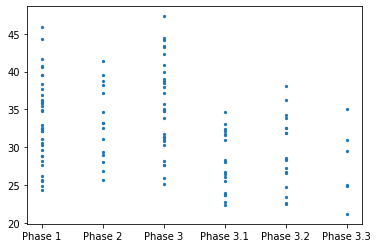

In [32]:
plt.scatter(Texas['NewPhase'], Texas['Value'], s= 5)

plt.show()

In [33]:
#create column 123, corresponding to each indicator
#use as color map for a plot 

# Trends by Age

In [74]:
#in the Texas df, look at By Age 

Texas['Group'].unique()

#after isolating df to Texas only, it also seems to isolate Group column to "By State" only, so it does not allow me to filter "By Age " this way

array(['By State'], dtype=object)

In [78]:
Texas['Subgroup'].unique()

#it also seems to filter texas only in the subgroup column 

array(['Texas'], dtype=object)

In [79]:
clean_df['Subgroup'].unique()

#however, without filtering Texas, the Subgroup has so many categories within it, thinking about splitting this up somehow but not sure yet. 

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

# Trends by Race

In [63]:
#in the Texas df, look at By Race in the Group Column

Texas['Group'].unique()

array(['By State'], dtype=object)

# Find trends in the 3 symptoms across the 3 phases 

#This is a bigger task, best to break down into smaller parts. I will start by looking at Phase 1 & Symptoms of Depressive Disorder 
- Phase 2 & Depressive Disorder 
- Phace 3 & Depressive Disorder 
- Phase 1 & Anxiety Disorder
- Phase 2 & Anxiety Disorder 
- and so forth. 

I could create a function that has paramenters (phase, symptom) 

In [ ]:
#in the Texas df, should I create a df of phases and df of symptoms and then use those to locate what I need? 

# Example of a function

In [ ]:
#example
def function_name(parameters):
    # do something
    print("hello!")
    return None

In [ ]:
def double(number):
    output = number+number
    return output

In [ ]:
double(5)

10

In [ ]:
double(15)

30